# Data Analysis

### SEN9120: Advanced Agent Based Modeling
Cruz Torres Francesco, 4999959
<br> Herzog Rico, 5095530

In [1]:
# Import necessary scintific computing, data analysis and visualization packages
%matplotlib inline
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
import seaborn as sns


import scipy.stats as stats
import statistics
import math

In [28]:
for name in sorted(os.listdir("./results")):
    print(name)

outcomes2021-2-6-20-18.csv
outcomes2021-2-6-21-00.csv
outcomes2021-2-7-0-32_50 samples.csv
outcomes2021-2-9-3-42_150 samples.csv
outcomes2021-2-9-7-27_150 samples.csv
parameters2021-2-6-20-18.csv
parameters2021-2-6-21-00.csv
parameters2021-2-7-0-32_50 samples.csv
parameters2021-2-9-3-42_150 samples.csv
parameters2021-2-9-7-27_150 samples.csv


In [29]:
#access all results files and store them in dataframes

count_outcomes = 1
count_parameters = 1

for name in sorted(os.listdir("./results")):
    path = os.path.join("./results", name)
        
    if "outcomes" in name:
        globals()["outcomes_"+str(count_outcomes)] = pd.read_csv(path)
        count_outcomes += 1
        
    #othwerwise the filename starts with "parameters"
    else:
        globals()["parameters_"+str(count_parameters)] = pd.read_csv(path)
        count_parameters += 1

In [30]:
# for each couple of files (parameters ; outcome) merge the two files together
for i,j in zip(range(1,count_parameters), range(1,count_outcomes)):
    globals()["results_"+str(i)] = pd.merge(globals()["parameters_"+str(i)], globals()["outcomes_"+str(i)], left_on= "Unnamed: 0", right_on= "Run").drop("Unnamed: 0", axis=1)

In [31]:
# adjust the "Run" column such that each run is unique across all results files
results_2["Run"] = results_2["Run"] + results_1["Run"].iloc[-1] + 1
results_3["Run"] = results_3["Run"] + results_2["Run"].iloc[-1] + 1
results_4["Run"] = results_4["Run"] + results_3["Run"].iloc[-1] + 1
results_5["Run"] = results_5["Run"] + results_4["Run"].iloc[-1] + 1
results_5["Run"]

0        220
1        220
2        220
3        220
4        220
        ... 
14995    369
14996    369
14997    369
14998    369
14999    369
Name: Run, Length: 15000, dtype: int64

In [47]:
# combine all results dataframes into one dataframe, where Run is the unique key column
results = pd.concat([results_1, results_2, results_3, results_4, results_5], axis = 0)
results["MW_Total"] = results.iloc[:, -3:].sum(axis=1)
results

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Run,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
0,8.0,8.0,15.0,1.0,4.0,1.0,True,0,0,40.0,325.0,166.5,531.5
1,8.0,8.0,15.0,1.0,4.0,1.0,True,0,1,60.0,179.0,159.0,398.0
2,8.0,8.0,15.0,1.0,4.0,1.0,True,0,2,64.0,90.0,145.5,299.5
3,8.0,8.0,15.0,1.0,4.0,1.0,True,0,3,48.0,178.0,147.0,373.0
4,8.0,8.0,15.0,1.0,4.0,1.0,True,0,4,50.0,385.0,172.5,607.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,20.0,7.0,-2.0,2.0,18.0,True,369,95,100.0,521.0,448.5,1069.5
14996,2.0,20.0,7.0,-2.0,2.0,18.0,True,369,96,130.0,477.0,420.0,1027.0
14997,2.0,20.0,7.0,-2.0,2.0,18.0,True,369,97,144.0,464.0,391.5,999.5
14998,2.0,20.0,7.0,-2.0,2.0,18.0,True,369,98,130.0,444.0,429.0,1003.0


## Exploration of Variety 
How much does the random seed affect the outcomes of any given lever space combination?

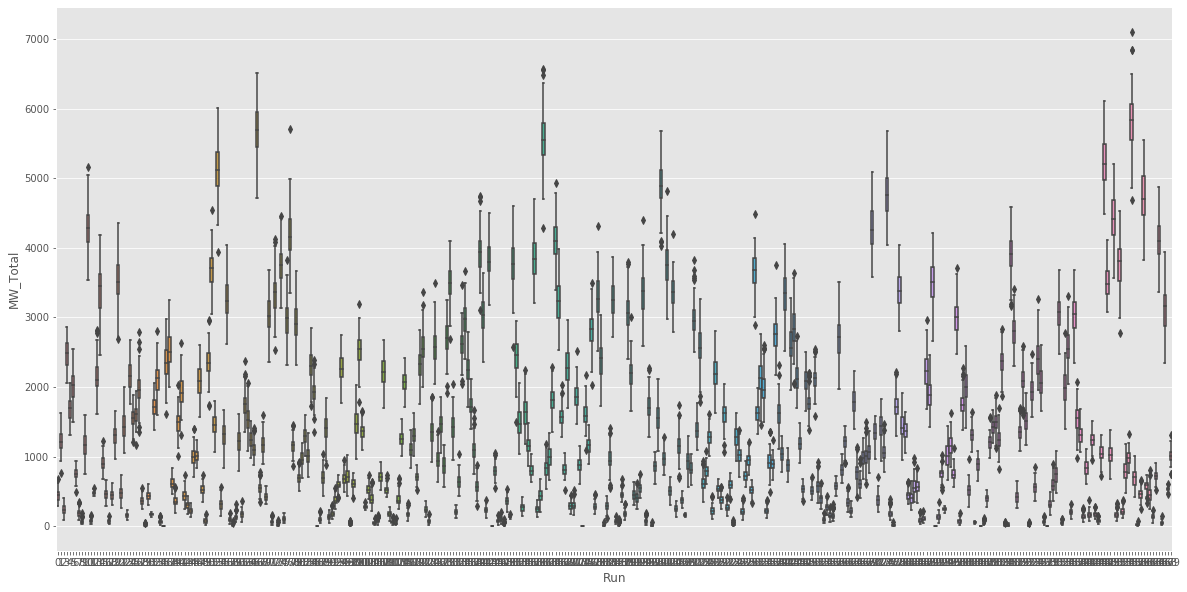

In [56]:
fig = sns.boxplot(x = results["Run"], y = results["MW_Total"])
fig.figure.set_size_inches(20, 10)

In [57]:
# save figure
fig = fig.get_figure()
fig.savefig("./Graphs/Oucome_variance.png") 

## Exploration of the Lever space
These pair plots show how the combinations of various parameters affect the outcome on terms of total GWH produced. 

In [146]:
lever_space = results.groupby("Run").mean()
lever_space["MW_Total"] = lever_space.iloc[:, -3:].sum(axis=1)
lever_space

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
Run,,,,,,,,,,,,
0,8.0,8.0,15.0,1.0,4.0,1.0,True,49.5,54.25,231.13,157.725,831.96
1,15.0,15.0,14.0,-4.0,-2.0,11.0,False,49.5,158.65,728.00,327.900,2270.45
2,19.0,5.0,20.0,-1.0,-4.0,14.0,False,49.5,31.22,131.17,74.280,442.12
3,7.0,25.0,3.0,2.0,-2.0,15.0,False,49.5,330.16,1484.64,656.100,4611.64
4,4.0,18.0,11.0,5.0,4.0,22.0,False,49.5,223.61,1005.85,458.355,3152.02
...,...,...,...,...,...,...,...,...,...,...,...,...
215,1.0,14.0,4.0,2.0,-1.0,21.0,False,49.5,102.53,404.84,285.870,1483.95
216,3.0,18.0,22.0,3.0,-4.0,6.0,True,49.5,170.60,687.84,418.350,2382.98
217,25.0,5.0,6.0,-3.0,1.0,2.0,False,49.5,27.63,117.26,74.520,411.19


In [147]:
sns.pairplot(lever_space.iloc[:,[0,1,2,3,4,5,6,-1]], hue="MW_Total", height=3)

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

C:\Users\frac1\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning:

Data must hav

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001DDADCF59D8> (for post_execute):


KeyboardInterrupt: 

## Explore which levers lead to the best outcomes
We take the minimum value across all random seeds as the measure for the best outcome and select the Top 10% of all the scenarios.

In [207]:
best_cases = results.groupby("Run").min()
best_cases = best_cases[best_cases["MW_Total"] > best_cases["MW_Total"].quantile(0.9)]
best_cases

,administrative-network-meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
Run,,,,,,,,,,,,
10,19.0,23.0,14.0,1.0,-5.0,23.0,True,0,484.0,2164.0,636.0,3541.5
20,23.0,22.0,8.0,-5.0,-5.0,24.0,True,0,350.0,1628.0,544.5,2694.0
51,13.0,23.0,18.0,4.0,4.0,15.0,False,0,370.0,1939.0,625.5,3051.0
53,19.0,24.0,13.0,2.0,-3.0,19.0,True,0,602.0,2535.0,742.5,3945.5
56,24.0,18.0,9.0,1.0,-2.0,12.0,False,0,303.0,1556.0,483.0,2615.5
66,22.0,24.0,11.0,5.0,-1.0,11.0,False,0,760.0,2942.0,765.0,4712.0
72,21.0,18.0,24.0,1.0,1.0,20.0,True,0,377.0,1548.0,490.5,2536.5
74,16.0,24.0,4.0,-2.0,5.0,19.0,True,0,365.0,1865.0,642.0,3135.5
77,20.0,24.0,24.0,0.0,-3.0,18.0,False,0,425.0,2173.0,667.5,3356.5


# PRIM Algorithm

In [58]:
# Imports
from ema_workbench.analysis import prim
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

In [102]:
prim_results = results.groupby(["Run"]).mean()
#prim_results.rename(columns={"administrative-network-meetings":"administrative network meetings"}, inplace=True)
prim_results

,administrative network meetings,total-project-proposal-frequency,informal-meetings-frequency,green-energy-openness-change,political-variety-change,max-project-capacity,random-intial-trust,Random Seed,MW_implemented_wind,MW_implemented_solar,MW_implemented_urban,MW_Total
Run,,,,,,,,,,,,
0,8.0,8.0,15.0,1.0,4.0,1.0,True,49.5,54.25,231.13,157.725,443.105
1,15.0,15.0,14.0,-4.0,-2.0,11.0,False,49.5,158.65,728.00,327.900,1214.550
2,19.0,5.0,20.0,-1.0,-4.0,14.0,False,49.5,31.22,131.17,74.280,236.670
3,7.0,25.0,3.0,2.0,-2.0,15.0,False,49.5,330.16,1484.64,656.100,2470.900
4,4.0,18.0,11.0,5.0,4.0,22.0,False,49.5,223.61,1005.85,458.355,1687.815
...,...,...,...,...,...,...,...,...,...,...,...,...
365,23.0,24.0,20.0,-4.0,0.0,7.0,True,49.5,637.82,2746.53,738.015,4122.365
366,17.0,2.0,25.0,-5.0,4.0,16.0,True,49.5,5.49,23.13,19.410,48.030
367,19.0,21.0,22.0,-1.0,0.0,21.0,False,49.5,458.18,2075.16,586.725,3120.065


In [103]:
x = prim_results.iloc[:,:7]
y = prim_results.iloc[:, -1] > results.iloc[:, -1].quantile(0.75)
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()

[MainProcess/INFO] 370 points remaining, containing 95 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.16486486486486487, coverage: 0.6421052631578947, density: 1.0 restricted_dimensions: 5


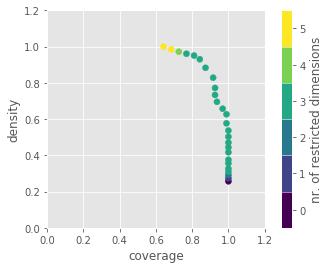

In [104]:
box1.show_tradeoff()
plt.show()

In [128]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.256757,0,1.000000,0.256757,0
1,1.000000,0.273775,1,0.937838,0.273775,1
2,1.000000,0.291411,2,0.881081,0.291411,2
3,1.000000,0.309446,3,0.829730,0.309446,3
4,1.000000,0.326460,4,0.786486,0.326460,3
5,1.000000,0.355805,5,0.721622,0.355805,3
6,1.000000,0.375494,6,0.683784,0.375494,3
7,1.000000,0.416667,7,0.616216,0.416667,3
8,1.000000,0.443925,8,0.578378,0.443925,3
9,1.000000,0.470297,9,0.545946,0.470297,3


coverage    0.842105
density     0.930233
id                20
mass        0.232432
mean        0.930233
res_dim            3
Name: 20, dtype: object

                                 box 20                                      
                                    min   max                       qp values
total-project-proposal-frequency   15.5  25.0  [1.0791774159885856e-21, -1.0]
administrative network meetings    10.5  25.0   [2.651314658366307e-10, -1.0]
max-project-capacity                1.5  25.0     [0.22143938037107916, -1.0]



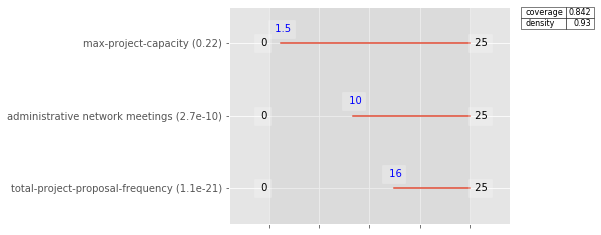

In [139]:
box1.inspect(20);
box1.inspect(20, style='graph')
plt.savefig("./Graphs/Prim_constraints_370_samples")
plt.show()

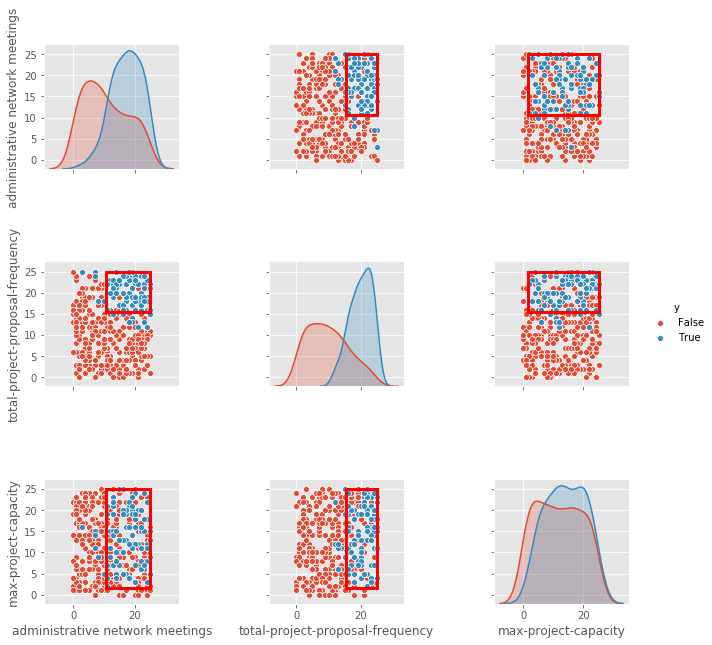

In [138]:
box1.show_pairs_scatter(20).fig.set_size_inches(10,9)
plt.savefig("./Graphs/Prim_Scenario_Discovery_370_samples")
plt.show(20)